In [22]:
from rbm import RestrictedBoltzmannMachine
from util import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error

sns.set_style('whitegrid')

### Load Dataset

In [16]:
image_size = [28, 28]
train_images, train_labels, test_images, test_labels = read_mnist()

## Analysis

### 4.1.1

Iteration over training process for minibatches of size 20

In [17]:
RBM = RestrictedBoltzmannMachine(ndim_visible=image_size[0] * image_size[1],
                                 ndim_hidden=500,
                                 is_bottom=True,
                                 image_size=image_size,
                                 is_top=False,
                                 n_labels=10,
                                 batch_size=20)

RBM.cd1(visible_trainset=train_images, n_iterations=20)

learning CD1
iteration=      0 recon_loss=0.0648
iteration=      2 recon_loss=0.0472
iteration=      4 recon_loss=0.0414
iteration=      6 recon_loss=0.0381
iteration=      8 recon_loss=0.0363
iteration=     10 recon_loss=0.0349
iteration=     12 recon_loss=0.0338
iteration=     14 recon_loss=0.0330
iteration=     16 recon_loss=0.0324
iteration=     18 recon_loss=0.0321


Plot delta loss for each iteration

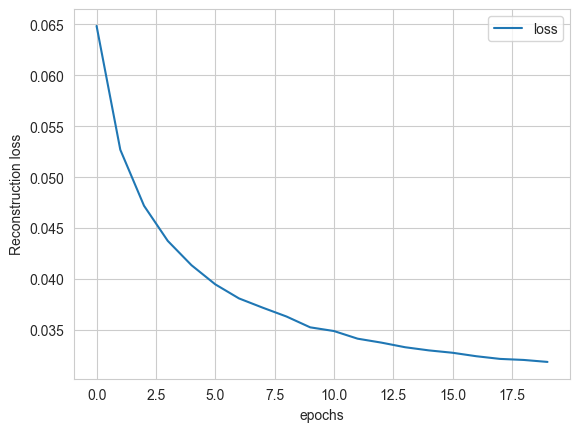

In [18]:
plt.plot(RBM.losses, label='loss')

plt.xlabel('epochs')
plt.ylabel('Reconstruction loss')
plt.legend()
plt.show()

Plot delta weight and biases for each iteration

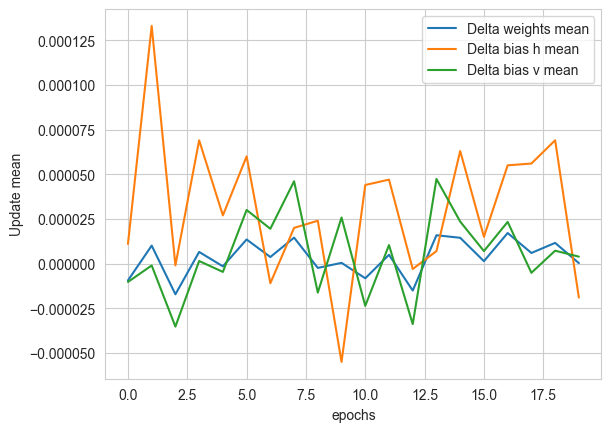

In [19]:
plt.plot(RBM.delta_weight_vh_mean, label='Delta weights mean')
plt.plot(RBM.delta_bias_h_mean, label='Delta bias h mean')
plt.plot(RBM.delta_bias_v_mean, label='Delta bias v mean')

plt.xlabel('epochs')
plt.ylabel('Update mean')
plt.legend()
plt.show()

### 4.1.2

Average reconstruction loss for number of hidden units 500 -> 200

In [20]:
n_units = [500, 400, 300, 200]
reconstruction_losses = []
for n in n_units:
    RBM = RestrictedBoltzmannMachine(ndim_visible=image_size[0] * image_size[1],
                                     ndim_hidden=n,
                                     is_bottom=True,
                                     image_size=image_size,
                                     is_top=False,
                                     n_labels=10,
                                     batch_size=20)
    RBM.cd1(visible_trainset=train_images, n_iterations=20)
    reconstruction_losses.append(RBM.losses)

learning CD1
iteration=      0 recon_loss=0.0651
iteration=      2 recon_loss=0.0472
iteration=      4 recon_loss=0.0413
iteration=      6 recon_loss=0.0383
iteration=      8 recon_loss=0.0362
iteration=     10 recon_loss=0.0349
iteration=     12 recon_loss=0.0337
iteration=     14 recon_loss=0.0331
iteration=     16 recon_loss=0.0326
iteration=     18 recon_loss=0.0321
learning CD1
iteration=      0 recon_loss=0.0673
iteration=      2 recon_loss=0.0494
iteration=      4 recon_loss=0.0436
iteration=      6 recon_loss=0.0400
iteration=      8 recon_loss=0.0379
iteration=     10 recon_loss=0.0363
iteration=     12 recon_loss=0.0353
iteration=     14 recon_loss=0.0344
iteration=     16 recon_loss=0.0337
iteration=     18 recon_loss=0.0332
learning CD1
iteration=      0 recon_loss=0.0710
iteration=      2 recon_loss=0.0530
iteration=      4 recon_loss=0.0466
iteration=      6 recon_loss=0.0429
iteration=      8 recon_loss=0.0406
iteration=     10 recon_loss=0.0389
iteration=     12 recon_l

Plot results

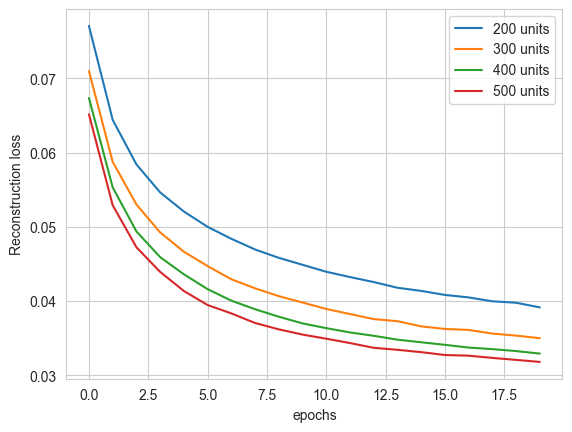

In [21]:
iterations = range(20)
plt.plot(iterations, reconstruction_losses[3], label="200 units")
plt.plot(iterations, reconstruction_losses[2], label="300 units")
plt.plot(iterations, reconstruction_losses[1], label="400 units")
plt.plot(iterations, reconstruction_losses[0], label="500 units")

plt.xlabel('epochs')
plt.ylabel('Reconstruction loss')
plt.legend()
plt.show()

### 4.1.3
Test images reconstruction

In [26]:
losses = []

for image in test_images:
    h = RBM.get_h_given_v(image)[1]
    reconstruction = RBM.get_v_given_h(h)[1]
    loss = mean_squared_error(image, reconstruction)
    losses.append(loss)

np.mean(losses)

0.03839720433271348

In [39]:
h1 = RBM.get_h_given_v(test_images[987])[1]
reconstruction1 = RBM.get_v_given_h(h1)[1]
h2 = RBM.get_h_given_v(test_images[1])[1]
reconstruction2 = RBM.get_v_given_h(h2)[1]
h3 = RBM.get_h_given_v(test_images[-1])[1]
reconstruction3 = RBM.get_v_given_h(h3)[1]
h4 = RBM.get_h_given_v(test_images[-2])[1]
reconstruction4 = RBM.get_v_given_h(h4)[1]

First test image

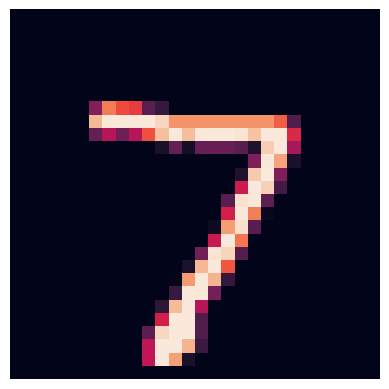

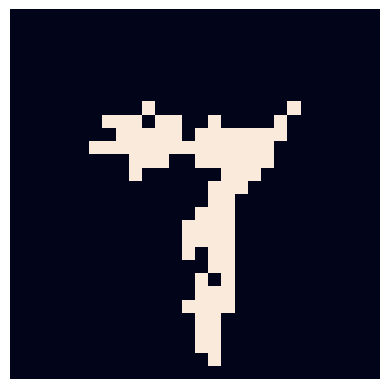

In [40]:
plt.imshow(test_images[0].reshape((image_size[0], image_size[1], -1)))
plt.grid(False)
plt.axis('off')
plt.show()

plt.imshow(reconstruction1.reshape((image_size[0], image_size[1], -1)))
plt.grid(False)
plt.axis('off')
plt.show()

Second test image

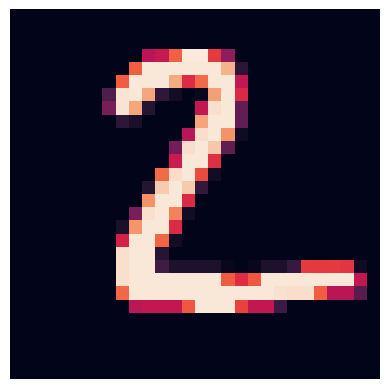

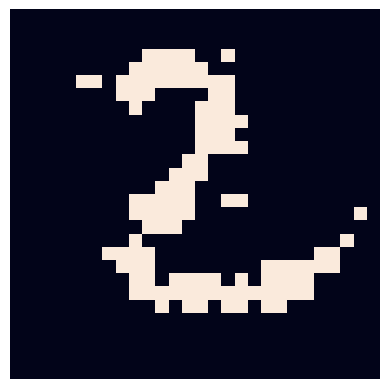

In [41]:
plt.imshow(test_images[1].reshape((image_size[0], image_size[1], -1)))
plt.grid(False)
plt.axis('off')
plt.show()

plt.imshow(reconstruction2.reshape((image_size[0], image_size[1], -1)))
plt.grid(False)
plt.axis('off')
plt.show()

Last test image

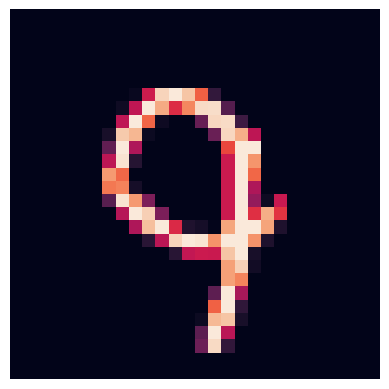

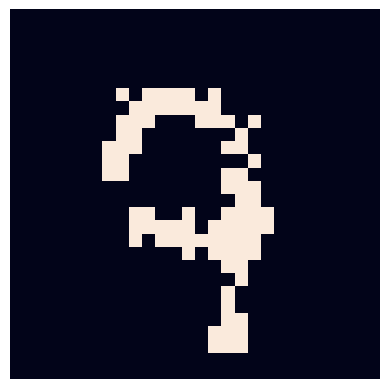

In [42]:
plt.imshow(test_images[-1].reshape((image_size[0], image_size[1], -1)))
plt.grid(False)
plt.axis('off')
plt.show()

plt.imshow(reconstruction3.reshape((image_size[0], image_size[1], -1)))
plt.grid(False)
plt.axis('off')
plt.show()

One before last test image

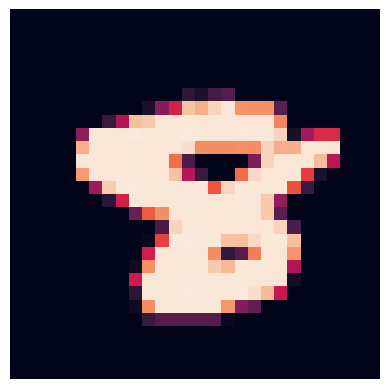

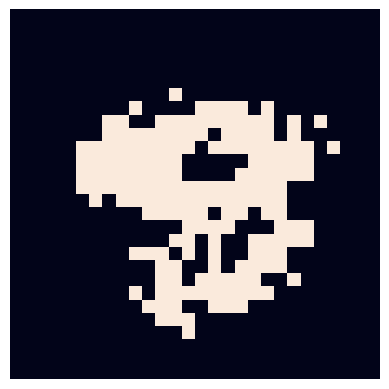

In [43]:
plt.imshow(test_images[-2].reshape((image_size[0], image_size[1], -1)))
plt.grid(False)
plt.axis('off')
plt.show()

plt.imshow(reconstruction4.reshape((image_size[0], image_size[1], -1)))
plt.grid(False)
plt.axis('off')
plt.show()